In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

/home/edraff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [3]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [4]:
import torch

In [5]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,], 
                             [7, 8,]])
#You don't have to format it like I did, thats just for clarity
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

In [6]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [7]:
x_np = np.random.random((4,4))
print(x_np)

[[0.71304914 0.75111365 0.88005547 0.30691052]
 [0.00798065 0.39193293 0.43515506 0.72272704]
 [0.92679196 0.54127469 0.89011186 0.02201878]
 [0.42746772 0.65896634 0.9028333  0.84611058]]


In [8]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.7130, 0.7511, 0.8801, 0.3069],
        [0.0080, 0.3919, 0.4352, 0.7227],
        [0.9268, 0.5413, 0.8901, 0.0220],
        [0.4275, 0.6590, 0.9028, 0.8461]], dtype=torch.float64)


In [9]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [10]:
#Lets force them to be 32-bit floats
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


In [11]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[ True  True  True False]
 [False False False  True]
 [ True  True  True False]
 [False  True  True  True]]
bool


In [12]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[ True,  True,  True, False],
        [False, False, False,  True],
        [ True,  True,  True, False],
        [False,  True,  True,  True]])
torch.bool


In [13]:
np.sum(x_np)

9.4244995

In [14]:
torch.sum(x_pt)

tensor(9.4245)

In [15]:
np.transpose(x_np)

array([[0.7130491 , 0.00798065, 0.92679197, 0.4274677 ],
       [0.75111365, 0.39193293, 0.54127467, 0.65896636],
       [0.8800555 , 0.43515506, 0.89011186, 0.9028333 ],
       [0.3069105 , 0.72272706, 0.02201878, 0.8461106 ]], dtype=float32)

In [16]:
torch.transpose(x_pt, 0, 1)

tensor([[0.7130, 0.0080, 0.9268, 0.4275],
        [0.7511, 0.3919, 0.5413, 0.6590],
        [0.8801, 0.4352, 0.8901, 0.9028],
        [0.3069, 0.7227, 0.0220, 0.8461]])

In [17]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


In [18]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [19]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [20]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)

In [21]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj
    
some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


<AxesSubplot:>

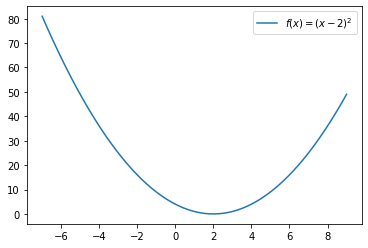

In [22]:
def f(x):
    return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,100) 
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')

<AxesSubplot:>

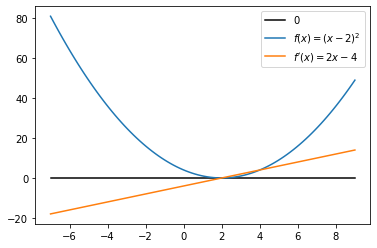

In [23]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")

In [24]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [25]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [26]:
value.backward()
print(x.grad)

tensor([-11.])


In [27]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object
    
    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)

tensor([2.0000])


In [28]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

In [29]:
optimizer = torch.optim.SGD([x_param], lr=eta)

In [30]:
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

tensor([2.0000])


In [31]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


In [32]:
class SimpleDataset(Dataset):
        
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into 
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets 

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset 
dataset = SimpleDataset(X, y)

In [33]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


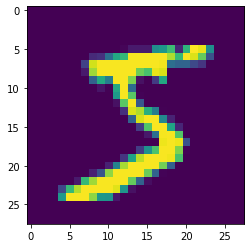

In [34]:
plt.imshow(example.reshape((28,28)))

In [35]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing
